![Futuristic electric car charging](IMG_8807.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, it's essential to understand the growth trends in charging facilities and sales to inform strategic planning. As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. The data is stored in two CSV files:
___

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

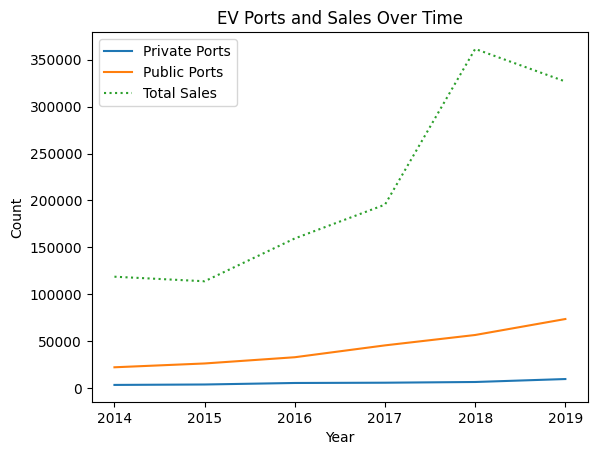

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

private = pd.read_csv("private_ev_charging.csv")
public = pd.read_csv("public_ev_charging.csv")
ev_sales = pd.read_csv("ev_sales.csv")

df_temp = private.merge(public, on = 'year', how='outer', indicator=True)
df_temp = df_temp[df_temp['_merge']=='both']
df_temp = df_temp.drop(columns=['_merge'])

total_sales = ev_sales.groupby('year')['sales'].sum().reset_index()
df_complete = df_temp.merge(total_sales, on='year', how='left')
df_complete = df_complete.dropna(subset='sales')
fig, ax = plt.subplots()
plot = sns.lineplot(data=df_complete, x='year', y='private_ports', label='Private Ports')
plot = sns.lineplot(data=df_complete, x='year', y='public_ports', label='Public Ports')
plot = sns.lineplot(data=df_complete, x='year', y='sales', label='Total Sales', linestyle=':')
plot = plot.set(xlabel="Year", ylabel="Count")
ax.set_title('EV Ports and Sales Over Time')
solution = "public"